# CNNs: Overfitting + Data Augmentation


### Get Ready

Dataset dogs vs. cats: datasets/dogs-vs-cats-2k.zip

Download, unpack and inspect the structure of our data.

In [ ]:
!wget https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/dogs-vs-cats-2k.zip

--2020-11-25 13:30:42--  https://www.mimuw.edu.pl/~bilinski/VRNN2020/labs/datasets/dogs-vs-cats-2k.zip
Resolving www.mimuw.edu.pl (www.mimuw.edu.pl)... 193.0.96.14
Connecting to www.mimuw.edu.pl (www.mimuw.edu.pl)|193.0.96.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90882120 (87M) [application/zip]
Saving to: ‘dogs-vs-cats-2k.zip’

dogs-vs-cats-2k.zip 100%[===================>]  86.67M  3.42MB/s    in 18s     

2020-11-25 13:31:01 (4.80 MB/s) - ‘dogs-vs-cats-2k.zip’ saved [90882120/90882120]



In [ ]:
!unzip dogs-vs-cats-2k.zip

Archive:  dogs-vs-cats-2k.zip
   creating: dogs-vs-cats-2k/
   creating: dogs-vs-cats-2k/test/
   creating: dogs-vs-cats-2k/val/
   creating: dogs-vs-cats-2k/train/
   creating: dogs-vs-cats-2k/test/dog/
  inflating: dogs-vs-cats-2k/test/dog/dog.1627.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1626.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1625.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1624.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1623.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1622.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1621.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1620.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1619.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1618.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1617.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1616.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1615.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1614.jpg  
  inflating: dogs-vs-cats-2k/test/dog/dog.1613.jpg  
 

### Data preprocessing

Read images as RGB tensors and rescale them to [0,1] interval. Read images in batches of batch_size=20 and resize them to 150x150.

In [ ]:
%tensorflow_version 2.x

from tensorflow.keras.preprocessing.image import ImageDataGenerator

imgs_train_dir = 'dogs-vs-cats-2k/train'
imgs_val_dir = 'dogs-vs-cats-2k/val'

# Rescale images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(imgs_train_dir, batch_size=20, target_size=(150, 150), class_mode='binary')
validation_generator = test_datagen.flow_from_directory(imgs_val_dir, batch_size=20, target_size=(150, 150), class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


###Implement NN

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))  # conv 3x3 32 filters + relu
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # max pooling 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # conv 3x3 64 filters + relu
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # max pooling 2x2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # conv 3x3 128 filters + relu
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # max pooling 2x2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # conv 3x3 128 filters + relu
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # max pooling 2x2
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # FC 512 + relu
model.add(layers.Dense(1, activation='sigmoid'))  # FC + sigmoid
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])  # RMSprop 1e-4 + accuracy metric
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 128)     

### What is the batch size?

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


###Train

In [ ]:
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50 )

Epoch 1/30
100/100 [==============================] - 9s 94ms/step - loss: 0.6896 - acc: 0.5335 - val_loss: 0.6745 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 0.6622 - acc: 0.5990 - val_loss: 0.6456 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6199 - acc: 0.6520 - val_loss: 0.6082 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5763 - acc: 0.7035 - val_loss: 0.6524 - val_acc: 0.6370
Epoch 5/30
100/100 [==============================] - 9s 93ms/step - loss: 0.5370 - acc: 0.7165 - val_loss: 0.6416 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5085 - acc: 0.7470 - val_loss: 0.5597 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 9s 92ms/step - loss: 0.4822 - acc: 0.7710 - val_loss: 0.6016 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 9s 92ms/step - 

###Save a model

In [ ]:
model.save('dogs_vs_cats_small_v1.h5')

###Plot accuracy and loss

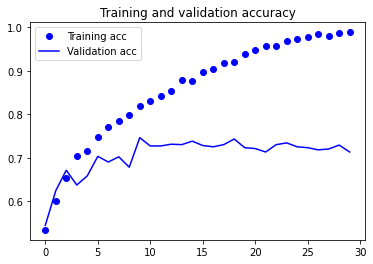

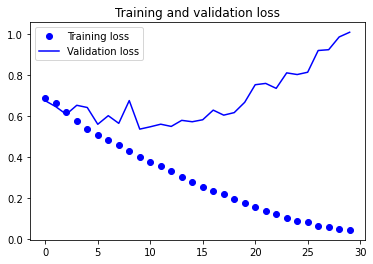

In [ ]:
import matplotlib.pyplot as plt

# get from variable "history"
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###Data augmentation
Use random transformations:

In [ ]:
datagen = ImageDataGenerator( rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest' )

###Visualize:

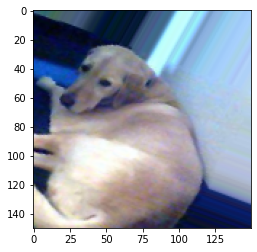

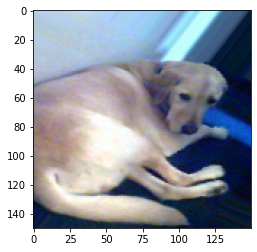

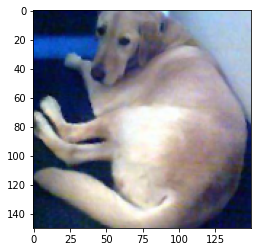

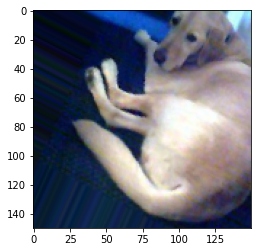

In [ ]:
from tensorflow.keras.preprocessing import image
f = 'dogs-vs-cats-2k/train/dog/dog.70.jpg'
img = image.load_img(f, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

###Add dropout 0.5 before FC.

In [ ]:
layer1 = model.get_layer(index=10)
layer2 = model.get_layer(index=9)
model.pop()
model.pop()
model.add(layers.Dropout(0.5))
model.add(layer2)
model.add(layer1)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 15, 15, 128)     

###Train

In [ ]:
train_datagen = ImageDataGenerator( rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True )
test_datagen = ImageDataGenerator( rescale=1./255 )
train_generator = train_datagen.flow_from_directory( imgs_train_dir, target_size=(150, 150), batch_size=20, class_mode='binary' )
validation_generator = test_datagen.flow_from_directory( imgs_val_dir, target_size=(150, 150), batch_size=20, class_mode='binary' )
history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6061 - acc: 0.6805 - val_loss: 0.5875 - val_acc: 0.6820
Epoch 2/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6011 - acc: 0.6855 - val_loss: 0.5655 - val_acc: 0.6940
Epoch 3/100
100/100 [==============================] - 19s 190ms/step - loss: 0.6004 - acc: 0.6720 - val_loss: 0.5557 - val_acc: 0.7060
Epoch 4/100
100/100 [==============================] - 19s 191ms/step - loss: 0.5908 - acc: 0.6875 - val_loss: 0.5436 - val_acc: 0.7340
Epoch 5/100
100/100 [==============================] - 19s 191ms/step - loss: 0.5832 - acc: 0.6920 - val_loss: 0.5573 - val_acc: 0.7210
Epoch 6/100
100/100 [==============================] - 19s 190ms/step - loss: 0.5877 - acc: 0.6700 - val_loss: 0.5471 - val_acc: 0.7070
Epoch 7/100
100/100 [==============================] - 19s 191ms/step - loss: 0.5685 - acc: 0.7165 -

###Save a model

In [ ]:
model.save('dogs_vs_cats_small_v2.h5')

###Plot accuracy and loss

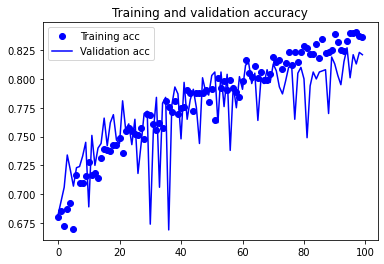

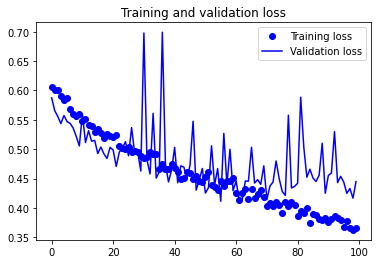

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()